---

## 1. Theoretical Concepts

### 1. What is a Decision Tree, and How Does It Work?
A **Decision Tree** is a supervised machine learning algorithm used for both classification and regression. It builds a tree-like model where:
- **Internal nodes** represent tests on features.
- **Branches** correspond to outcomes of these tests.
- **Leaf nodes** represent final predictions (class labels for classification or continuous values for regression).

At each node, the algorithm chooses a feature and a threshold (or split point) that best separates the data based on a criterion (e.g., reduction in impurity). This process is applied recursively until a stopping criterion is met (e.g., maximum depth, minimum samples per node, or pure nodes).

### 2. What Are Impurity Measures in Decision Trees?
**Impurity measures** quantify how mixed the classes are within a node. In building a decision tree, splits are chosen to reduce impurity—i.e., to create groups that are as homogeneous as possible. The two most common measures are:
- **Gini Impurity**
- **Entropy**

### 3. What Is the Mathematical Formula for Gini Impurity?
For a node with \( K \) classes and with \( p_i \) representing the proportion of samples in class \( i \), the **Gini impurity** is defined as:
\[
\text{Gini} = 1 - \sum_{i=1}^{K} p_i^2
\]
This value is 0 when the node is pure (all samples belong to one class) and reaches a maximum when the classes are uniformly distributed.

### 4. What Is the Mathematical Formula for Entropy?
**Entropy** measures the amount of disorder or uncertainty. For a node with \( K \) classes, it is given by:
\[
\text{Entropy} = - \sum_{i=1}^{K} p_i \log_2 (p_i)
\]
Like Gini, entropy is 0 when the node is pure and increases as the mix of classes becomes more even.

### 5. What Is Information Gain, and How Is It Used in Decision Trees?
**Information Gain (IG)** is the reduction in impurity achieved by a split. It is calculated as the difference between the impurity of the parent node and the weighted sum of the impurities of the child nodes. In formula:
\[
\text{IG} = \text{Impurity (parent)} - \sum_{j} \left(\frac{N_j}{N}\right) \text{Impurity (child}_j\text{)}
\]
Here, \( N_j \) is the number of samples in child node \( j \) and \( N \) is the number of samples in the parent. The split with the highest information gain is chosen.

### 6. What Is the Difference Between Gini Impurity and Entropy?
Both metrics measure the “purity” of a node:
- **Gini Impurity** is simpler to compute and measures the probability of misclassifying a randomly chosen element.
- **Entropy** (from information theory) tends to penalize impurity more strongly.
In practice, the choice between the two rarely makes a large difference, though Gini is computationally faster.

### 7. What Is the Mathematical Explanation Behind Decision Trees?
Mathematically, a decision tree builds a model by:
- **Recursively splitting** the feature space to minimize impurity (using Gini or Entropy).
- **Selecting splits** that maximize information gain.
- **Optimizing** a loss function (classification error or mean squared error for regression) on the training data.
The tree is grown until a stopping criterion is reached, forming a piecewise constant approximation of the underlying function.

### 8. What Is Pre-Pruning in Decision Trees?
**Pre-Pruning** (or early stopping) involves halting the tree growth before it perfectly classifies the training data. This is done by setting limits such as:
- Maximum depth
- Minimum number of samples required to split a node
- Minimum information gain required for a split

The goal is to avoid overfitting by not growing overly complex trees.

### 9. What Is Post-Pruning in Decision Trees?
**Post-Pruning** allows the tree to grow to full depth and then removes nodes (or subtrees) that provide little to no improvement in prediction accuracy. This process is often guided by a validation set or cross-validation to balance complexity with generalization.

### 10. What Is the Difference Between Pre-Pruning and Post-Pruning?
- **Pre-Pruning:** Stops the tree growth early by setting limits; may risk underfitting if stopped too soon.
- **Post-Pruning:** Grows a full tree first and then trims back; typically results in a more robust model by removing branches that overfit.

### 11. What Is a Decision Tree Regressor?
A **Decision Tree Regressor** is a tree-based model used for predicting continuous outcomes. Instead of using class purity metrics (Gini or Entropy), it typically uses the reduction in variance or mean squared error (MSE) to choose splits.

### 12. What Are the Advantages and Disadvantages of Decision Trees?
**Advantages:**
- **Interpretability:** Easy to understand and visualize.
- **Data Types:** Can handle both numerical and categorical features.
- **Little Preprocessing:** Minimal data preparation required.
- **Non-Linear Relationships:** Can capture complex patterns.

**Disadvantages:**
- **Overfitting:** Prone to overfitting if not pruned.
- **Instability:** Small changes in data can lead to very different trees.
- **Bias:** Can be biased toward features with more levels if not controlled.
- **Generalization:** Often outperformed by ensemble methods (e.g., Random Forests).

### 13. How Does a Decision Tree Handle Missing Values?
Decision trees may handle missing values in several ways:
- **Surrogate Splits:** Use alternative features that mimic the primary splitting feature.
- **Imputation:** Replace missing values with statistical estimates.
- **Treating Missing as a Category:** For categorical features, missing can be considered a separate category.

### 14. How Does a Decision Tree Handle Categorical Features?
Decision trees can directly work with categorical features by:
- **Splitting on Categories:** For features with a small number of categories.
- **Encoding:** For features with many categories, techniques such as one-hot encoding may be applied.

### 15. What Are Some Real-World Applications of Decision Trees?
Decision Trees are used across many domains, including:
- **Medical Diagnosis:** Classifying diseases based on symptoms.
- **Credit Scoring:** Evaluating risk in financial lending.
- **Marketing:** Customer segmentation and targeted marketing.
- **Fraud Detection:** Identifying fraudulent transactions.
- **Predictive Maintenance:** Forecasting equipment failures.
- **Spam Filtering:** Classifying emails as spam or not spam.

---

---

## 2. Practical Python Implementations

Below are Python code solutions for each programming task. You can run these scripts (each code block is self-contained) in an environment where the necessary packages (e.g., scikit-learn, matplotlib, seaborn, graphviz) are installed.

### 2.1. Decision Tree Classifier on the Iris Dataset

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict and print model accuracy
y_pred = clf.predict(X_test)
print("Iris Dataset - Model Accuracy:", accuracy_score(y_test, y_pred))

Iris Dataset - Model Accuracy: 1.0


### 2.2. Decision Tree Classifier Using Gini Impurity & Feature Importances

In [2]:
# Train classifier using Gini Impurity
clf_gini = DecisionTreeClassifier(criterion="gini", random_state=42)
clf_gini.fit(X_train, y_train)

# Print feature importances
print("Feature Importances (Gini):", clf_gini.feature_importances_)

Feature Importances (Gini): [0.         0.01911002 0.89326355 0.08762643]


### 2.3. Decision Tree Classifier Using Entropy & Model Accuracy

In [3]:
# Train classifier using Entropy criterion
clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state=42)
clf_entropy.fit(X_train, y_train)

# Predict and print accuracy
y_pred_entropy = clf_entropy.predict(X_test)
print("Iris Dataset - Accuracy (Entropy):", accuracy_score(y_test, y_pred_entropy))

Iris Dataset - Accuracy (Entropy): 0.9777777777777777


### 2.4. Decision Tree Regressor on a Housing Dataset with MSE Evaluation

In [4]:
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Load housing dataset (California Housing)
housing = fetch_california_housing()
X_housing, y_housing = housing.data, housing.target

# Split dataset
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(X_housing, y_housing, test_size=0.3, random_state=42)

# Train Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train_h, y_train_h)

# Predict and evaluate using MSE
y_pred_h = regressor.predict(X_test_h)
print("Housing Dataset - Mean Squared Error:", mean_squared_error(y_test_h, y_pred_h))

Housing Dataset - Mean Squared Error: 0.5280096503174904


### 2.5. Visualizing a Decision Tree Using Graphviz

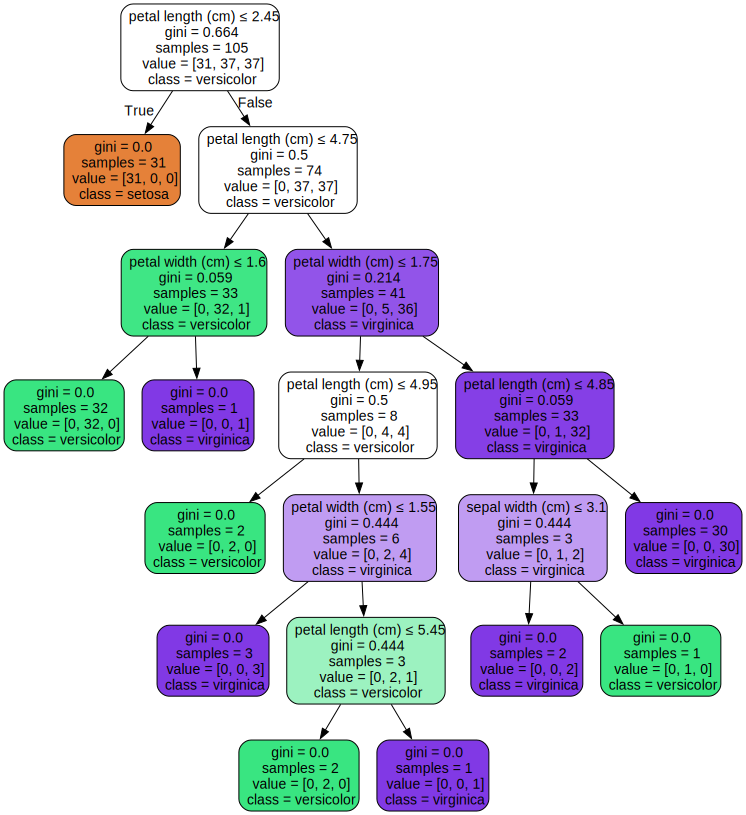

In [5]:
from sklearn.tree import export_graphviz
import graphviz

# Export the tree in DOT format
dot_data = export_graphviz(clf, out_file=None,
                           feature_names=iris.feature_names,
                           class_names=iris.target_names,
                           filled=True, rounded=True,
                           special_characters=True)
# Generate and display the graph
graph = graphviz.Source(dot_data)
graph.render("iris_tree")  # Saves the visualization as a file
graph  # Display in supported environments (e.g., Jupyter Notebook)

### 2.6. Classifier with Maximum Depth of 3 vs. Fully Grown Tree

In [6]:
# Decision Tree with maximum depth of 3
clf_depth3 = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_depth3.fit(X_train, y_train)
y_pred_depth3 = clf_depth3.predict(X_test)
acc_depth3 = accuracy_score(y_test, y_pred_depth3)
print("Accuracy (max_depth=3):", acc_depth3)

# Fully grown Decision Tree
clf_full = DecisionTreeClassifier(random_state=42)
clf_full.fit(X_train, y_train)
y_pred_full = clf_full.predict(X_test)
acc_full = accuracy_score(y_test, y_pred_full)
print("Accuracy (full tree):", acc_full)

Accuracy (max_depth=3): 1.0
Accuracy (full tree): 1.0


### 2.7. Classifier with min_samples_split=5 vs. Default Tree

In [7]:
# Decision Tree with min_samples_split=5
clf_min_samples = DecisionTreeClassifier(min_samples_split=5, random_state=42)
clf_min_samples.fit(X_train, y_train)
y_pred_min_samples = clf_min_samples.predict(X_test)
acc_min_samples = accuracy_score(y_test, y_pred_min_samples)
print("Accuracy (min_samples_split=5):", acc_min_samples)

# Default Decision Tree
clf_default = DecisionTreeClassifier(random_state=42)
clf_default.fit(X_train, y_train)
y_pred_default = clf_default.predict(X_test)
acc_default = accuracy_score(y_test, y_pred_default)
print("Accuracy (default):", acc_default)

Accuracy (min_samples_split=5): 1.0
Accuracy (default): 1.0


### 2.8. Feature Scaling Before Training vs. Unscaled Data

In [8]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train classifier on scaled data
clf_scaled = DecisionTreeClassifier(random_state=42)
clf_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = clf_scaled.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test, y_pred_scaled)
print("Accuracy (with feature scaling):", acc_scaled)

# Note: Decision Trees are generally scale-invariant so accuracy differences may be minimal.

Accuracy (with feature scaling): 1.0


### 2.9. One-vs-Rest (OvR) Strategy for Multiclass Classification

In [9]:
from sklearn.multiclass import OneVsRestClassifier

# Wrap the Decision Tree Classifier with OneVsRest strategy
clf_ovr = OneVsRestClassifier(DecisionTreeClassifier(random_state=42))
clf_ovr.fit(X_train, y_train)
y_pred_ovr = clf_ovr.predict(X_test)
acc_ovr = accuracy_score(y_test, y_pred_ovr)
print("Accuracy (One-vs-Rest):", acc_ovr)

Accuracy (One-vs-Rest): 1.0


### 2.10. Displaying Feature Importance Scores

In [10]:
# Train the classifier and display feature importances
clf_feature = DecisionTreeClassifier(random_state=42)
clf_feature.fit(X_train, y_train)
print("Feature Importance Scores:", clf_feature.feature_importances_)

Feature Importance Scores: [0.         0.01911002 0.89326355 0.08762643]


### 2.11. Decision Tree Regressor: max_depth=5 vs. Unrestricted Tree

In [11]:
# Regressor with max_depth=5
clf_reg_max5 = DecisionTreeRegressor(max_depth=5, random_state=42)
clf_reg_max5.fit(X_train_h, y_train_h)
y_pred_reg_max5 = clf_reg_max5.predict(X_test_h)
mse_max5 = mean_squared_error(y_test_h, y_pred_reg_max5)
print("MSE (max_depth=5):", mse_max5)

# Unrestricted (fully grown) regressor
clf_reg_full = DecisionTreeRegressor(random_state=42)
clf_reg_full.fit(X_train_h, y_train_h)
y_pred_reg_full = clf_reg_full.predict(X_test_h)
mse_full = mean_squared_error(y_test_h, y_pred_reg_full)
print("MSE (unrestricted tree):", mse_full)

MSE (max_depth=5): 0.5210801561811793
MSE (unrestricted tree): 0.5280096503174904


### 2.12. Cost Complexity Pruning (CCP) & Its Effect on Accuracy

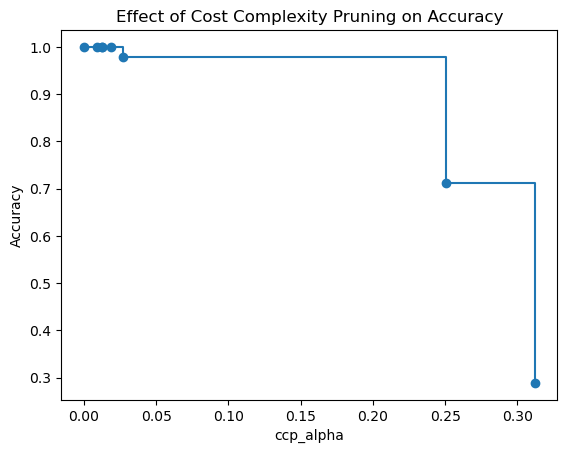

In [12]:
# Obtain the cost complexity pruning path for the unpruned tree
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

accuracies = []
for ccp_alpha in ccp_alphas:
    clf_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf_pruned.fit(X_train, y_train)
    accuracies.append(accuracy_score(y_test, clf_pruned.predict(X_test)))

import matplotlib.pyplot as plt

plt.figure()
plt.plot(ccp_alphas, accuracies, marker='o', drawstyle="steps-post")
plt.xlabel("ccp_alpha")
plt.ylabel("Accuracy")
plt.title("Effect of Cost Complexity Pruning on Accuracy")
plt.show()

### 2.13. Evaluating Classifier Performance Using Precision, Recall, and F1-Score

In [13]:
from sklearn.metrics import classification_report

clf_metrics = DecisionTreeClassifier(random_state=42)
clf_metrics.fit(X_train, y_train)
y_pred_metrics = clf_metrics.predict(X_test)

# Print a detailed classification report
print("Classification Report:\n", classification_report(y_test, y_pred_metrics))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



### 2.14. Visualizing the Confusion Matrix with Seaborn

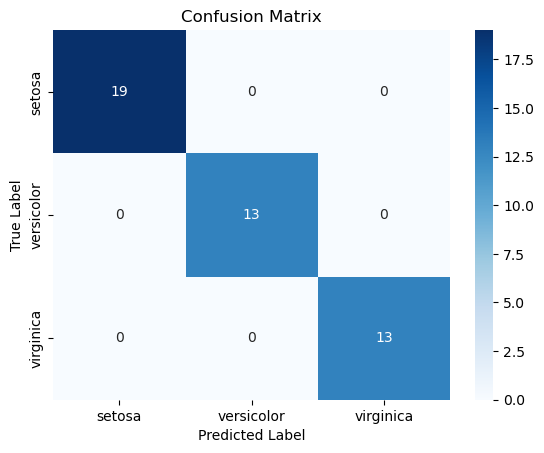

In [14]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

### 2.15. Hyperparameter Tuning Using GridSearchCV

In [15]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for max_depth and min_samples_split
param_grid = {
    'max_depth': [None, 3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_split': 10}
Best Cross-Validation Accuracy: 0.9428571428571428
